In [2]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Reading Data

In [3]:
# importing data sets
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

# Data Cleaning

In [4]:
# checking train data set
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# checking test data set
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
# checking columns
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
# checking test columns
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
# checking sum of nulls
train.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [9]:
# checking mean of the nulls
train.isnull().mean()

Id                0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.160897
Lot Area          0.000000
Street            0.000000
Alley             0.931741
Lot Shape         0.000000
Land Contour      0.000000
Utilities         0.000000
Lot Config        0.000000
Land Slope        0.000000
Neighborhood      0.000000
Condition 1       0.000000
Condition 2       0.000000
Bldg Type         0.000000
House Style       0.000000
Overall Qual      0.000000
Overall Cond      0.000000
Year Built        0.000000
Year Remod/Add    0.000000
Roof Style        0.000000
Roof Matl         0.000000
Exterior 1st      0.000000
Exterior 2nd      0.000000
Mas Vnr Type      0.010726
Mas Vnr Area      0.010726
Exter Qual        0.000000
Exter Cond        0.000000
                    ...   
Half Bath         0.000000
Bedroom AbvGr     0.000000
Kitchen AbvGr     0.000000
Kitchen Qual      0.000000
TotRms AbvGrd     0.000000
Functional        0.000000
F

In [10]:
# checking test null values
test.isnull().sum()

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      160
Lot Area            0
Street              0
Alley             821
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
                 ... 
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Cars         0
Garage Area         0
Garage Qua

In [11]:
# dropping alley columns for nulls
train.drop('Alley', axis = 1, inplace = True)
test.drop('Alley', axis = 1, inplace = True)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
# checking test data
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [13]:
#dropping misc features
train.drop('Misc Feature', axis = 1, inplace = True)
test.drop('Misc Feature', axis = 1, inplace = True)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,0,3,2010,WD,138500


In [14]:
# checking test data
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,112,0,0,0,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,184,0,0,0,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,0,0,185,0,NaN,NaN,0,7,2009,WD


In [15]:
# dropping pool quality
train.drop('Pool QC', axis = 1, inplace = True)
test.drop('Pool QC', axis = 1, inplace = True)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,0,3,2010,WD,138500


In [16]:
# checking test data
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,NaN,0,7,2009,WD


In [17]:
# dropping fence
train.drop('Fence', axis = 1, inplace = True)
test.drop('Fence', axis = 1, inplace = True)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


In [18]:
# checking test data
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,0,60,112,0,0,0,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,...,170,0,0,0,0,0,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,100,24,0,0,0,0,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,0,184,0,0,0,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,...,0,76,0,0,185,0,0,7,2009,WD


In [19]:
# checking Fireplace Qu column for values
train['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [20]:
#changing Fireplace Qu values
train['Fireplace Qu'] = train['Fireplace Qu'].map({'Ex': 5, 'Gd': 4,
                                                   'TA': 3, 'Fa': 2,
                                                   'Po': 1, 'Na': 0 })
# changing test data values
test['Fireplace Qu'] = test['Fireplace Qu'].map({'Ex': 5, 'Gd': 4,
                                                   'TA': 3, 'Fa': 2,
                                                   'Po': 1, 'Na': 0 })
# Checking null values 
train['Fireplace Qu'].isnull().sum()

1000

In [21]:
# checking test null values
test['Fireplace Qu'].isnull().sum()

422

In [22]:
# writing a function to change null values to 0
def convert_nan(data, column):
    return data[column].replace(np.nan, 0, inplace = True)

In [23]:
# changing null values for Fireplace Qu
convert_nan(train, 'Fireplace Qu')
convert_nan(test, 'Fireplace Qu')

In [24]:
# checking null changes
train['Fireplace Qu'].isnull().sum()

0

In [25]:
# checking test data
test['Fireplace Qu'].isnull().sum()

0

In [26]:
# changing null values for Lot Frontage
convert_nan(train, 'Lot Frontage')
convert_nan(test, 'Lot Frontage')
train['Lot Frontage'].isnull().sum()

0

In [27]:
# checking test data
test['Lot Frontage'].isnull().sum()

0

In [28]:
# dropping mas Vnr Type/Area
train.drop(['Mas Vnr Area', 'Mas Vnr Type'], axis = 1, inplace = True)
test.drop(['Mas Vnr Area', 'Mas Vnr Type'], axis = 1, inplace = True)

In [29]:
# checking garage value counts and types
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [30]:
# checking test data garage values
test['Garage Type'].value_counts()

Attchd     518
Detchd     246
BuiltIn     54
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64

In [31]:
# changing the garage types to numeric 
train['Garage Type'] = train['Garage Type'].map({'2Types': 6, 'Attchd': 5,
                                                 'Basment': 4, 'BuiltIn': 3,
                                                 'CarPort': 2, 'Detchd': 1,
                                                 'NA': 0})
# changing test data values
test['Garage Type'] = test['Garage Type'].map({'2Types': 6, 'Attchd': 5,
                                                 'Basment': 4, 'BuiltIn': 3,
                                                 'CarPort': 2, 'Detchd': 1,
                                                 'NA': 0})
train['Garage Type'].isnull().sum()

113

In [32]:
# checking test data
test['Garage Type'].isnull().sum()

44

In [33]:
# convert null values to 0 in Garage Type
convert_nan(train, 'Garage Type')
convert_nan(test, 'Garage Type')
train['Garage Type'].isnull().sum()

0

In [34]:
# checking test data change
test['Garage Type'].isnull().sum()

0

In [35]:
# convert Garage Cars
convert_nan(train, 'Garage Cars')
convert_nan(test, 'Garage Cars')
train['Garage Cars'].isnull().sum()

0

In [36]:
# checking test data
test['Garage Cars'].isnull().sum()

0

In [37]:
# Convert Garage Yr Built nulls
convert_nan(train, 'Garage Yr Blt')
convert_nan(test, 'Garage Yr Blt')
train['Garage Yr Blt'].isnull().sum()

0

In [38]:
# checking test data nulls
test['Garage Yr Blt'].isnull().sum()

0

In [39]:
# checking Garage Car value counts
train['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [40]:
# checking test data values for Garage Cars
test['Garage Cars'].value_counts()

2    467
1    254
3    111
0     44
4      3
Name: Garage Cars, dtype: int64

In [41]:
# checking Garage Yr Blt value counts
train['Garage Yr Blt'].value_counts()

0.0       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1950.0     32
1968.0     32
1958.0     32
1996.0     31
1956.0     31
1966.0     29
2001.0     27
1965.0     27
1995.0     26
1967.0     26
1997.0     26
1979.0     25
1962.0     25
1954.0     25
1964.0     25
         ... 
1925.0      6
1982.0      6
1938.0      6
1942.0      6
1928.0      6
1922.0      6
1923.0      5
1916.0      5
1910.0      5
1946.0      5
1921.0      4
1927.0      4
1937.0      4
1915.0      4
1924.0      4
1947.0      3
1931.0      3
1900.0      3
1929.0      2
1934.0      2
1914.0      2
2010.0      2
1932.0      2
1933.0      1
2207.0      1
1919.0      1
1917.0      1
1896.0      1
1895.0      1
1918.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [42]:
# checking Garage year built for test
test['Garage Yr Blt'].value_counts()

0.0       45
2005.0    37
2006.0    35
2007.0    31
2004.0    27
2003.0    26
1977.0    20
1950.0    19
1997.0    18
2008.0    17
1968.0    16
1974.0    16
1993.0    16
1960.0    16
1999.0    15
1976.0    15
1998.0    14
2000.0    14
1980.0    14
1994.0    14
1969.0    14
1957.0    14
2001.0    14
1959.0    13
2002.0    13
1920.0    12
1970.0    12
1963.0    12
2009.0    12
1954.0    12
          ..
1949.0     4
1953.0     4
1983.0     4
1946.0     4
1941.0     4
1924.0     4
1900.0     3
1986.0     3
1915.0     3
2010.0     3
1982.0     3
1975.0     3
1922.0     2
1947.0     2
1932.0     2
1934.0     2
1937.0     2
1987.0     2
1918.0     2
1921.0     1
1928.0     1
1931.0     1
1916.0     1
1908.0     1
1943.0     1
1917.0     1
1935.0     1
1906.0     1
1927.0     1
1923.0     1
Name: Garage Yr Blt, Length: 94, dtype: int64

In [43]:
# checking null vales of Garage Area
train['Garage Area'].isnull().sum()

1

In [44]:
# checking test data null values for Garage Area
test['Garage Area'].isnull().sum()

0

In [45]:
# converting null values to 0
convert_nan(train, 'Garage Area')
convert_nan(test, 'Garage Area')
train['Garage Area'].isnull().sum()

0

In [46]:
# checking null values for test data
test['Garage Area'].isnull().sum()

0

In [47]:
# checking null values for Garage Finish
train['Garage Finish'].isnull().sum()

114

In [48]:
# checking test data nulls in Garage Finish
test['Garage Finish'].isnull().sum()

45

In [49]:
# checking Value Counts for Garage Finish
train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [50]:
# checking Garage Finish values in test data
test['Garage Finish'].isnull().sum()

45

In [51]:
# map new values and convert nulls then check the null values
train['Garage Finish'] = train['Garage Finish'].map({'Fin': 3, 'RFn': 2,
                                                     'Unf': 1, 'NA': 0})
# converting values in test data
test['Garage Finish'] = test['Garage Finish'].map({'Fin': 3, 'RFn': 2,
                                                     'Unf': 1, 'NA': 0})
convert_nan(train, 'Garage Finish')
convert_nan(test, 'Garage Finish')
train['Garage Finish'].isnull().sum()

0

In [52]:
# checking test data nulls
test['Garage Finish'].isnull().sum()

0

In [53]:
# checking value counts for Garage Quality
train['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [54]:
# checking value counts for Garage Quality in test data
test['Garage Qual'].value_counts()

TA    783
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64

In [55]:
# changing values to numeric
train['Garage Qual'] = train['Garage Qual'].map({'Ex': 5, 'Gd': 4,
                                                 'TA': 3, 'Fa': 2,
                                                 'Po': 1, 'NA': 0})
# changing test data values to numeric
test['Garage Qual'] = test['Garage Qual'].map({'Ex': 5, 'Gd': 4,
                                                 'TA': 3, 'Fa': 2,
                                                 'Po': 1, 'NA': 0})
# convert null values
convert_nan(train, 'Garage Qual')
convert_nan(test, 'Garage Qual')
# checking nulls
train['Garage Qual'].isnull().sum()

0

In [56]:
# checking test data nulls
test['Garage Qual'].isnull().sum()

0

In [57]:
# checking value counts on Condition
train['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [58]:
# checking value counts on test Garage Cond.
test['Garage Cond'].value_counts()

TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64

In [59]:
# changing values to numeric
train['Garage Cond'] = train['Garage Cond'].map({'Ex': 5, 'Gd': 4,
                                                 'TA': 3, 'Fa': 2,
                                                 'Po': 1, 'NA': 0})
# changing test data values to numeric
test['Garage Cond'] = test['Garage Cond'].map({'Ex': 5, 'Gd': 4,
                                                 'TA': 3, 'Fa': 2,
                                                 'Po': 1, 'NA': 0})
# converting nulls
convert_nan(train, 'Garage Cond')
convert_nan(test, 'Garage Cond')
# checking nulls
train['Garage Cond'].isnull().sum()

0

In [60]:
# checking nulls in test data
test['Garage Cond'].isnull().sum()

0

In [61]:
# checking total nulls in data
train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual         55
Bsmt Cond         55
                  ..
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual  

In [62]:
# checking value counts for Basement Quality
train['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [63]:
# changing the values to numeric
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex': 5, 'Gd': 4,
                                             'TA': 3, 'Fa': 2,
                                             'Po': 1, 'NA': 0})
# changing test data to numeric
test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex': 5, 'Gd': 4,
                                             'TA': 3, 'Fa': 2,
                                             'Po': 1, 'NA': 0})
convert_nan(train, 'Bsmt Qual') # converting nulls
convert_nan(test, 'Bsmt Qual')
train['Bsmt Qual'].isnull().sum() # checking nulls in column

0

In [64]:
# checking nulls in test data
test['Bsmt Qual'].isnull().sum()

0

In [65]:
# changing/ converting for Bsmt Cond.
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex': 5, 'Gd': 4,
                                             'TA': 3, 'Fa': 2,
                                             'Po': 1, 'NA': 0})
# converting to numeric in test data
test['Bsmt Cond'] = test['Bsmt Cond'].map({'Ex': 5, 'Gd': 4,
                                             'TA': 3, 'Fa': 2,
                                             'Po': 1, 'NA': 0})
# converting null values
convert_nan(train, 'Bsmt Cond')
convert_nan(test, 'Bsmt Cond')
train['Bsmt Cond'].isnull().sum()

0

In [66]:
# checking for null values in test data
test['Bsmt Cond'].isnull().sum()

0

In [67]:
# combining basement half baths to half baths column
train['Half Bath'] = train['Half Bath'] + train['Bsmt Half Bath']
test['Half Bath'] = test['Half Bath'] + test['Bsmt Half Bath']
convert_nan(train, 'Half Bath') # converting null values to 0
convert_nan(test, 'Half Bath')

train['Half Bath'].isnull().sum() # checking nulls

0

In [68]:
# checking null values in test data
test['Half Bath'].isnull().sum()

0

In [70]:
# combining full baths in one column
train['baths'] = train['Full Bath'] + train['Bsmt Full Bath']
test['baths'] = test['Full Bath'] + test['Bsmt Full Bath']

# converting nulls into 0
convert_nan(train, 'Full Bath')
convert_nan(test, 'Full Bath')
train['Full Bath'].isnull().sum()

0

In [71]:
# checking nulls in test data
test['Full Bath'].isnull().sum()

0

In [72]:
# dropping bath columns in basement
train.drop(['Bsmt Half Bath', 'Bsmt Full Bath'], axis = 1, inplace = True)
test.drop(['Bsmt Half Bath', 'Bsmt Full Bath'], axis = 1, inplace = True)

In [73]:
# converting remaining nulls into 0
train.replace(np.nan, 0, inplace = True)
test.replace(np.nan, 0, inplace = True)
train.isnull().sum().sum()

0

In [74]:
# checking null values in test dataset
test.isnull().sum().sum()

0

In [75]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Dr

In [76]:
# creating column for Square Feet
train['total_sf'] = train['Total Bsmt SF'] + train['Gr Liv Area']
test['total_sf'] = test['Total Bsmt SF'] + test['Gr Liv Area']

In [77]:
# creating column for house age
train['house age'] = train['Yr Sold'] - train['Year Built']
test['house age'] = test['Yr Sold'] - test['Year Built']

In [78]:
# saving both data sets to new cleaned data sets
train.to_csv('./datasets/train_clean.csv')
test.to_csv('./datasets/test_clean.csv')

In [79]:
# checking dataframe shape
test.shape

(879, 75)

In [80]:
# checking dataframe shape for train
train.shape

(2051, 76)

In [83]:
# creating dummy data sets for model
train_test = pd.get_dummies(train)
test_test = pd.get_dummies(test)

In [84]:
# checking dataframe shapes
train_test.shape, test_test.shape

((2051, 249), (879, 237))

In [86]:
# creating list with dataframe
train_list = list(train_test.columns)

In [87]:
# creating set from list
train_set = set(train_list)

In [88]:
# creating list from dataframe
test_list = list(test_test)

In [89]:
# creating a set out of list
test_set = set(test_list)

In [90]:
# checking for missing columns
train_set - test_set

{'Condition 2_Artery',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Electrical_Mix',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Functional_Sal',
 'Functional_Sev',
 'Heating QC_Po',
 'Heating_OthW',
 'Heating_Wall',
 'MS Zoning_A (agr)',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_ClyTile',
 'Roof Matl_Membran',
 'SalePrice',
 'Utilities_NoSeWa'}

In [126]:
# checking columns in test dummy set
test_set

{'1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Bedroom AbvGr',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Bsmt Cond',
 'Bsmt Exposure_0',
 'Bsmt Exposure_Av',
 'Bsmt Exposure_Gd',
 'Bsmt Exposure_Mn',
 'Bsmt Exposure_No',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1_0',
 'BsmtFin Type 1_ALQ',
 'BsmtFin Type 1_BLQ',
 'BsmtFin Type 1_GLQ',
 'BsmtFin Type 1_LwQ',
 'BsmtFin Type 1_Rec',
 'BsmtFin Type 1_Unf',
 'BsmtFin Type 2_0',
 'BsmtFin Type 2_ALQ',
 'BsmtFin Type 2_BLQ',
 'BsmtFin Type 2_GLQ',
 'BsmtFin Type 2_LwQ',
 'BsmtFin Type 2_Rec',
 'BsmtFin Type 2_Unf',
 'Central Air_N',
 'Central Air_Y',
 'Condition 1_Artery',
 'Condition 1_Feedr',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 1_RRAe',
 'Condition 1_RRAn',
 'Condition 1_RRNe',
 'Condition 1_RRNn',
 'Condition 2_Feedr',
 'Condition 2_Norm',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Electrical_0',
 'Ele

In [117]:
# checking missing columns
test_set - train_set

{'Electrical_0',
 'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_Floor',
 'Kitchen Qual_Po',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [130]:
# adding columns missing from train data dummy set from test to train set
train_test.assign(test_set = 0, inplace = True)
train_test.head() # checking column changes

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Qual,...,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,3.0,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,4.0,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,3.0,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,4.0,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,2.0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
# adding columns missing from test data dummy set from train to test set
test_test.assign(train_set = 0, inplace = True)
test_test.head() # checking column changes

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Bsmt Qual,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,69.0,9142,6,8,1910,1950,2.0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,0.0,9662,5,4,1977,1977,4.0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,58.0,17104,7,5,2006,2006,4.0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,3.0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,0.0,9500,6,5,1963,1963,4.0,...,0,0,0,0,0,0,0,0,0,1


# Exploratory Data Analysis

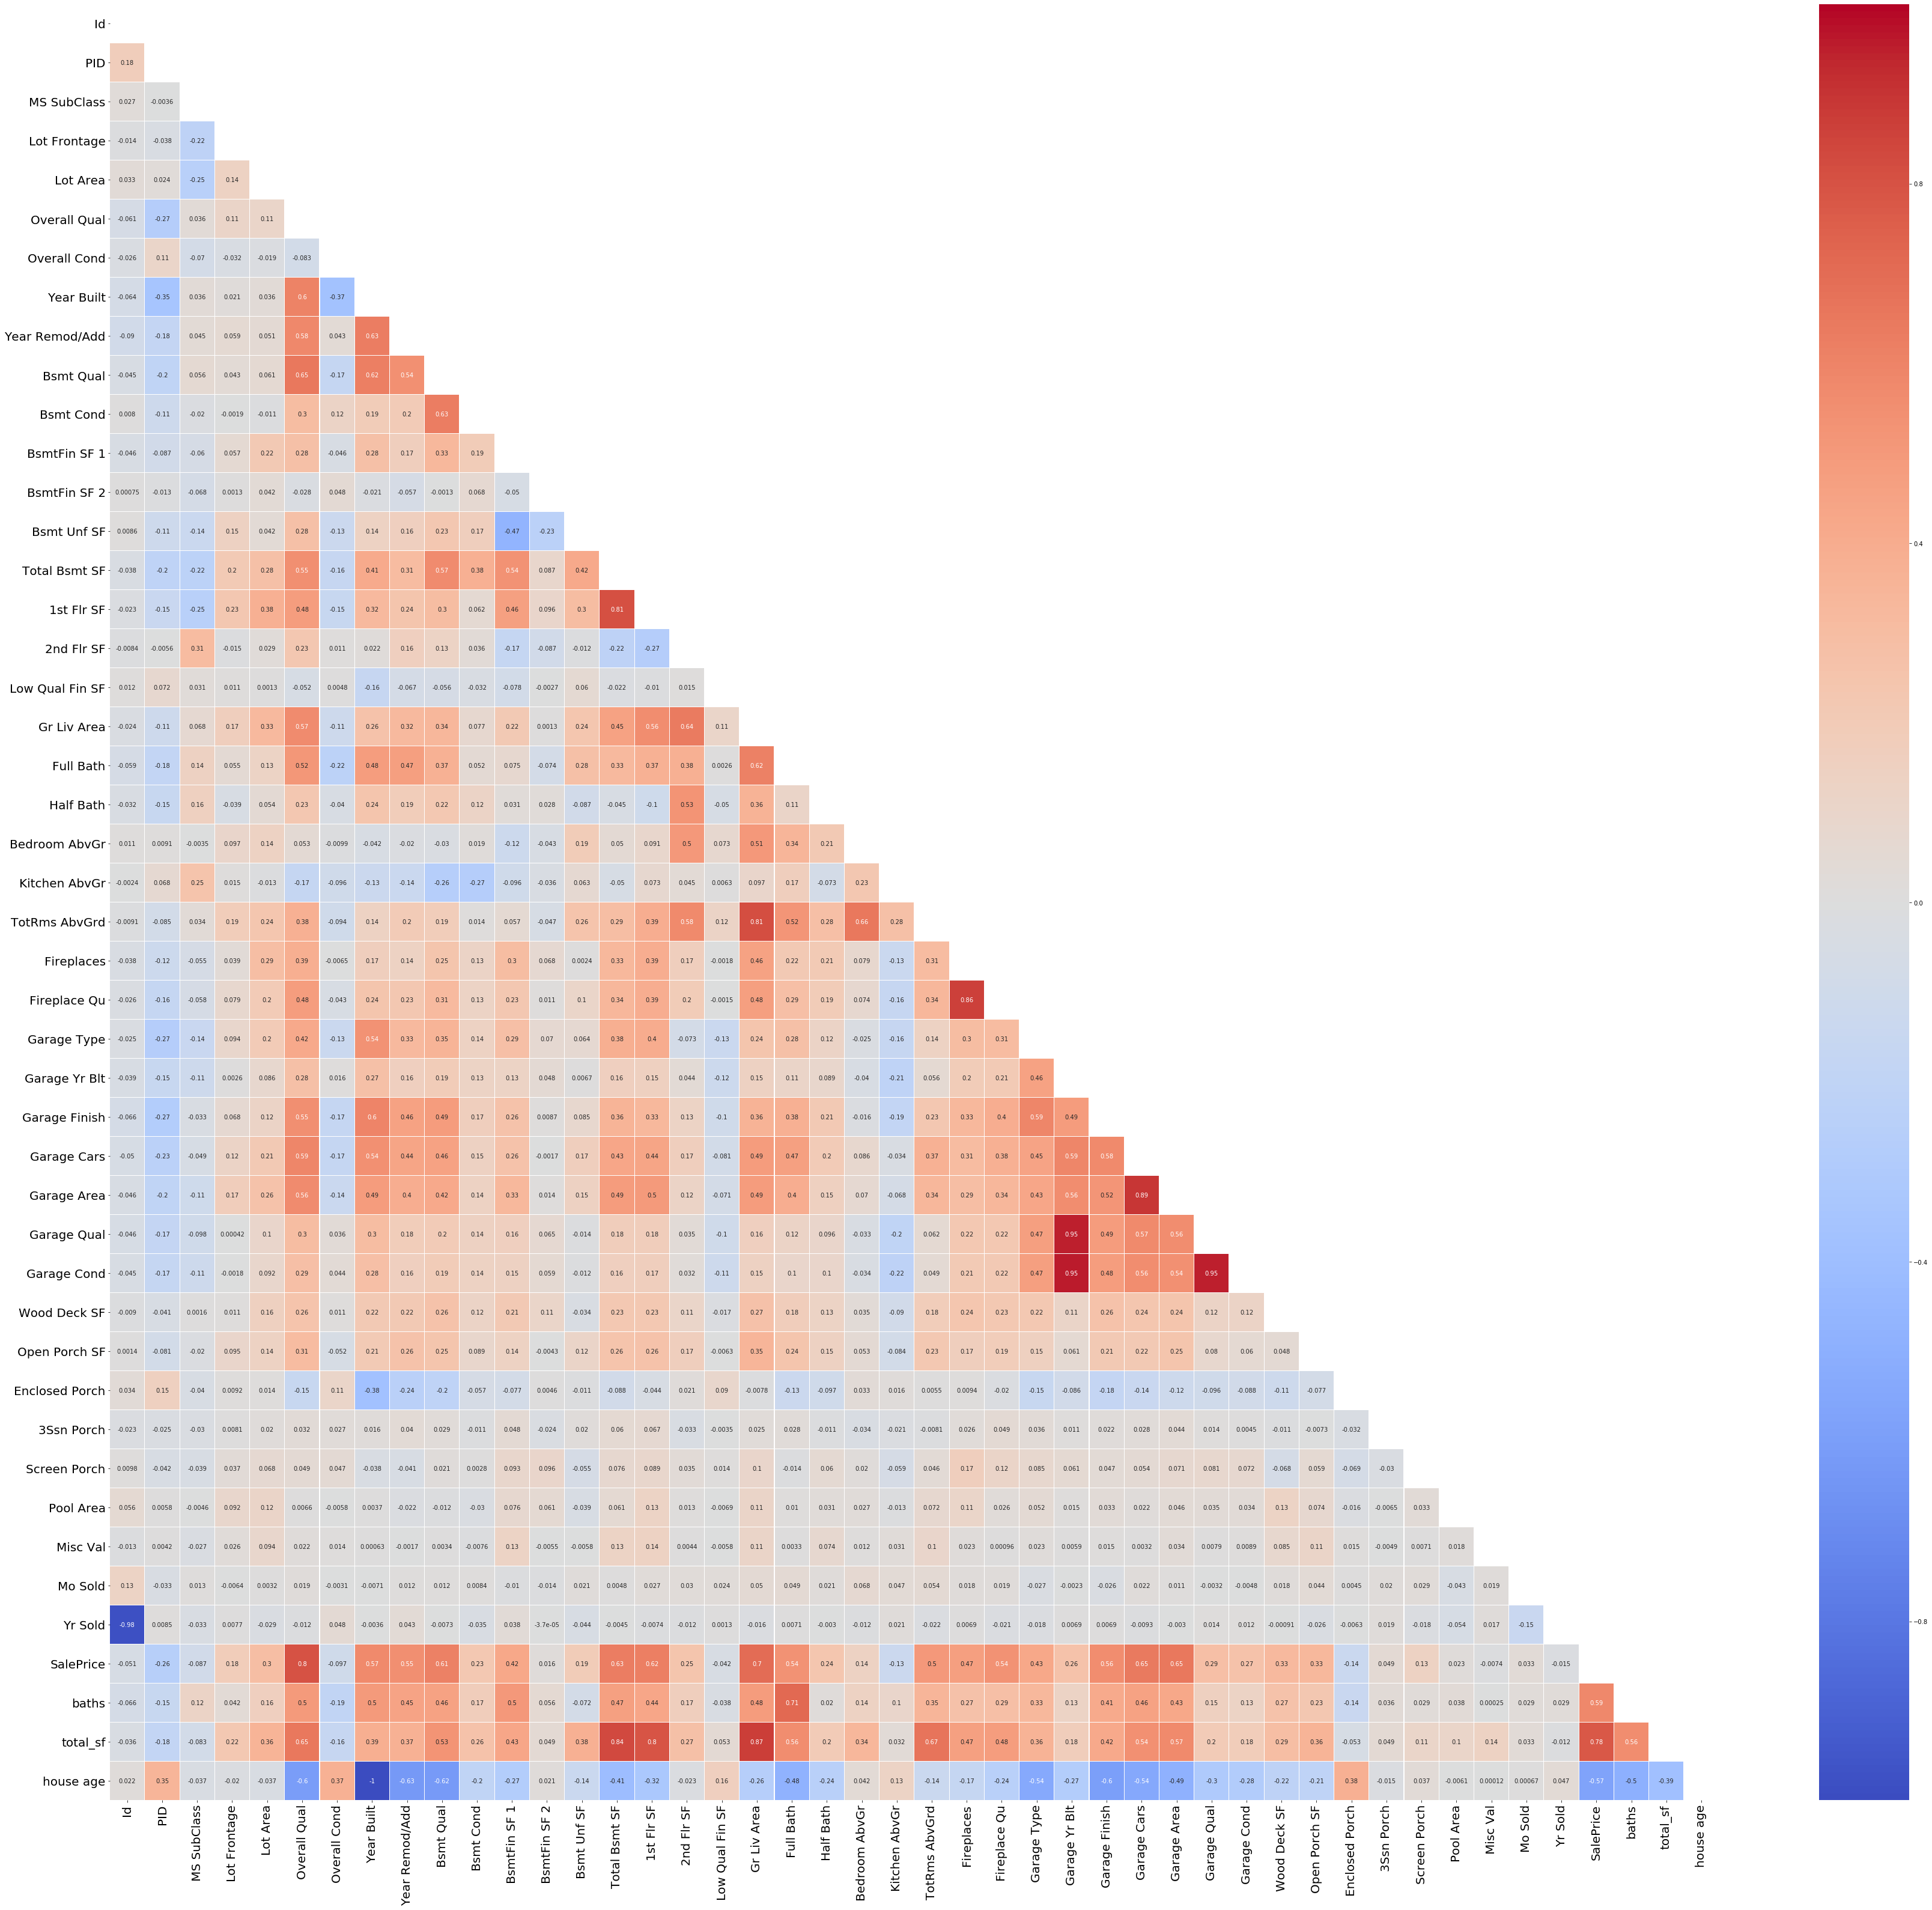

In [340]:
# # plotting correlation
plt.figure(figsize=(60,55))
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train.corr(), annot = True, cmap='coolwarm', linewidths=.1, mask = mask)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

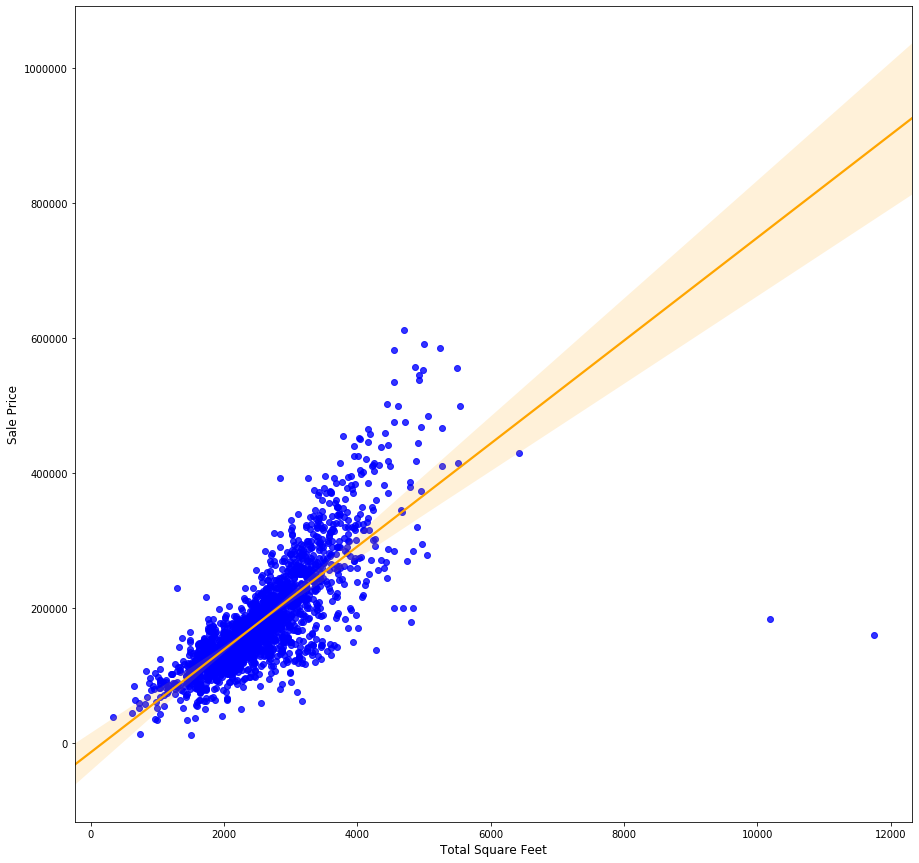

In [95]:
plt.figure(figsize = (15,15))
sns.regplot(x = 'total_sf', y = 'SalePrice', scatter = True, data = train, color = 'blue', line_kws = {'color':'orange'})
plt.xlabel('Total Square Feet', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);

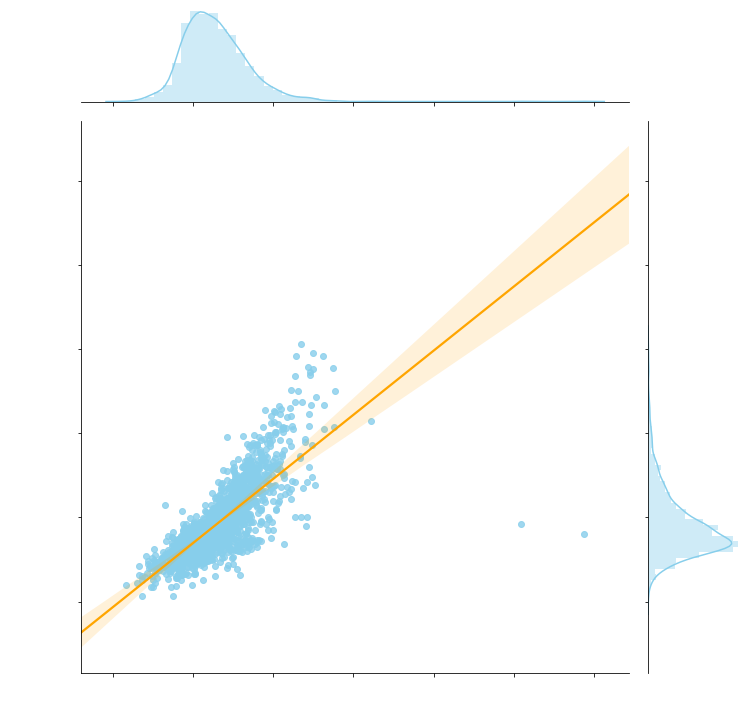

In [352]:
sns.jointplot(x="total_sf", y="SalePrice", data=train, kind="reg", color = 'skyblue',
              height = 10,line_kws = {'color': 'orange'})
plt.xlabel('Total Square Feet', fontsize = 20, c = 'white')
plt.ylabel('Sale Price', fontsize = 20, c = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white');

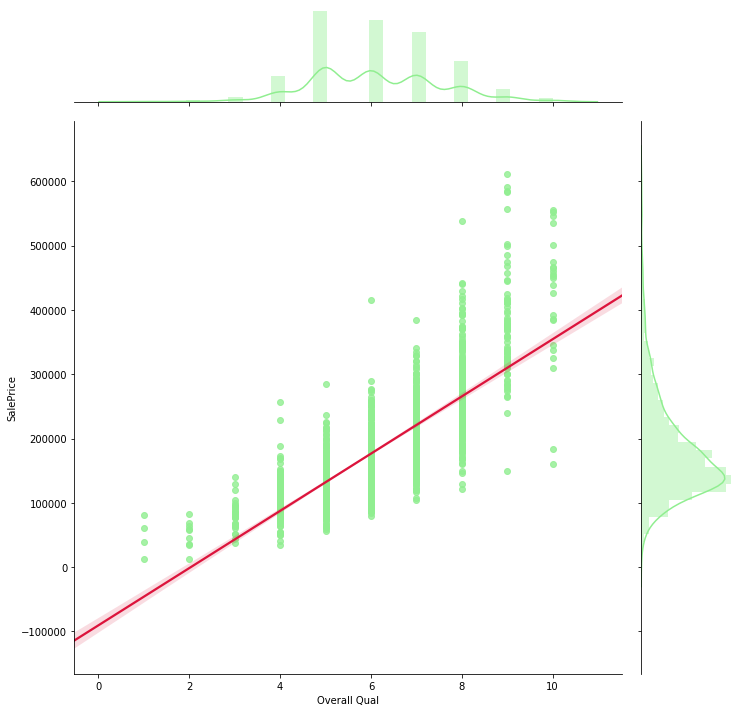

In [341]:
sns.jointplot(x="Overall Qual", y="SalePrice", data=train, kind="reg", color = 'lightgreen',
              height = 10,line_kws = {'color': 'crimson'});

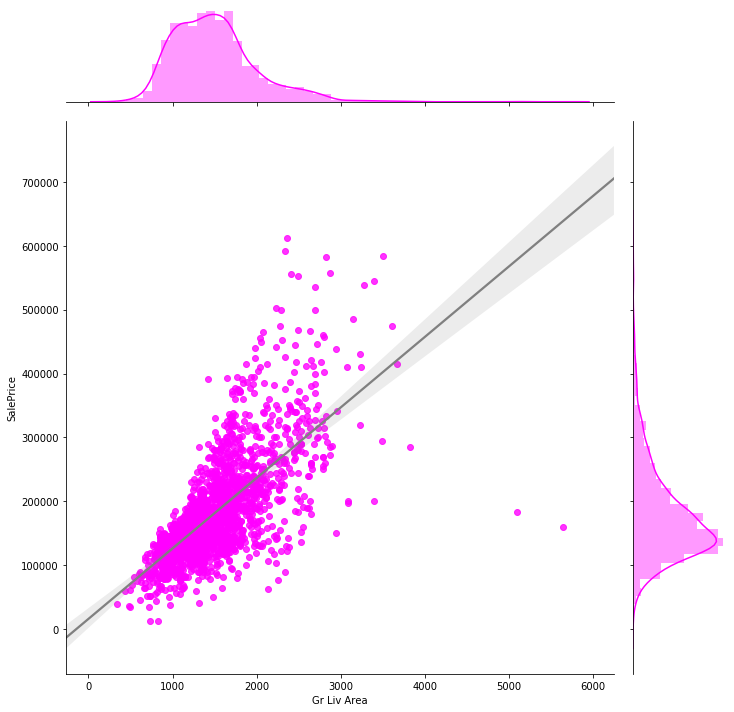

In [345]:
sns.jointplot(x="Gr Liv Area", y="SalePrice", data=train, kind="reg", color = 'magenta',
              height = 10,line_kws = {'color': 'grey'});

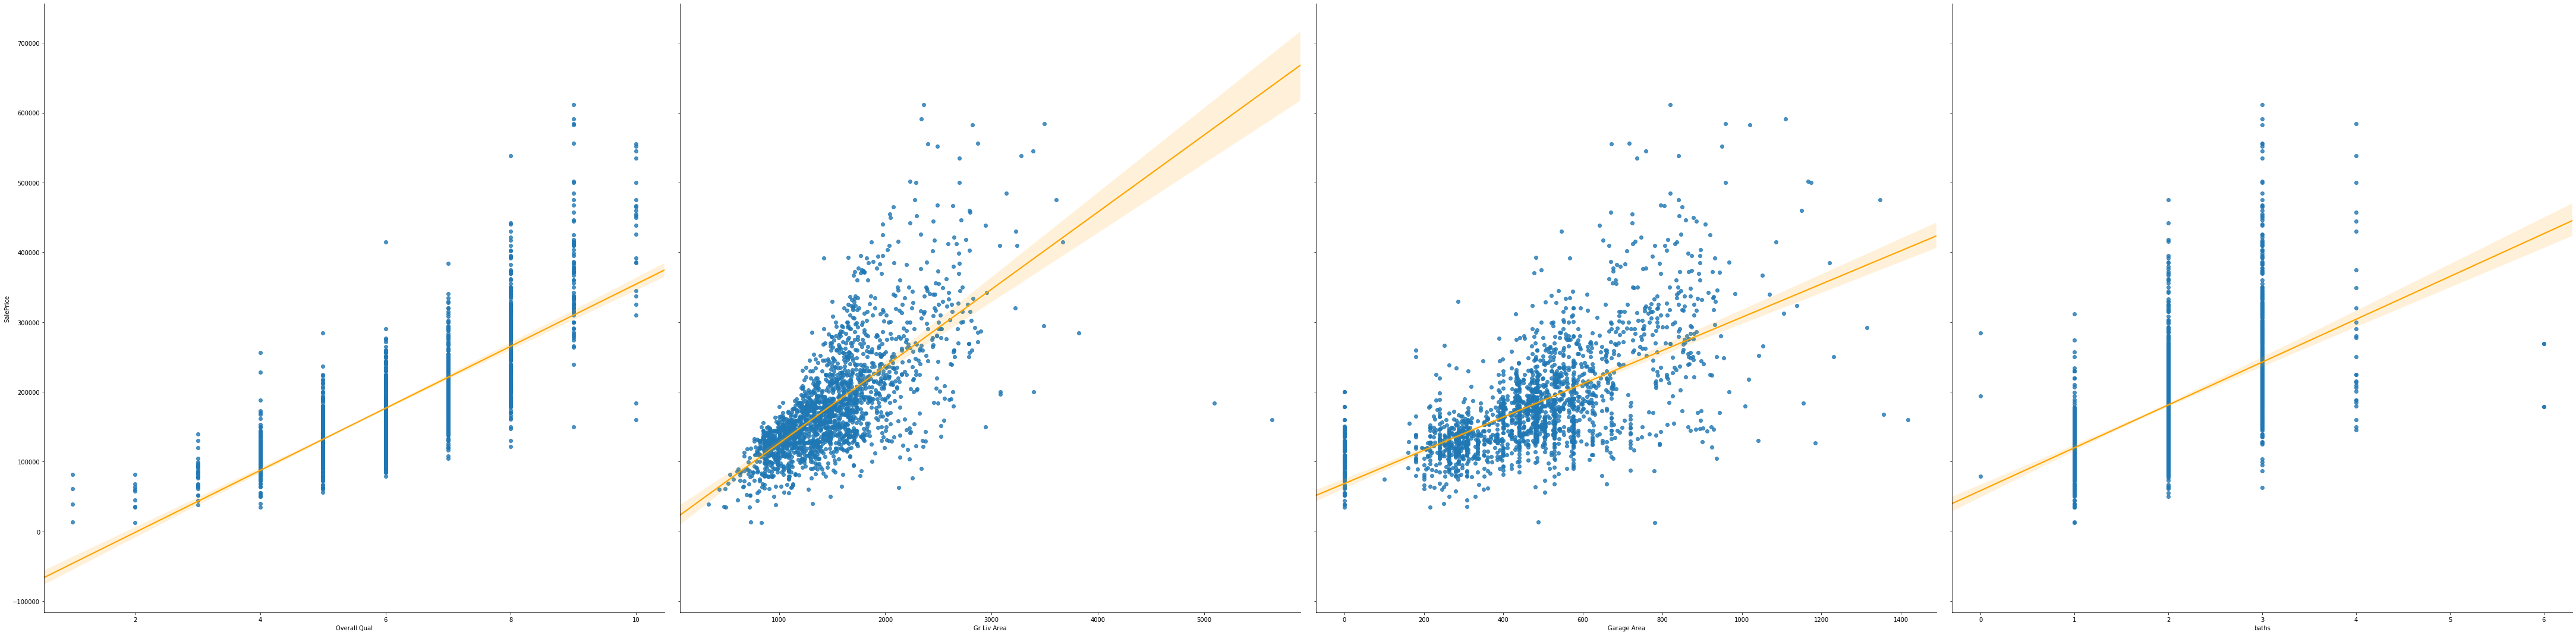

In [108]:
sns.pairplot(train, y_vars = ['SalePrice'], x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'baths'],
             height = 15, kind ='reg', plot_kws={'line_kws':{'color':'orange'}});

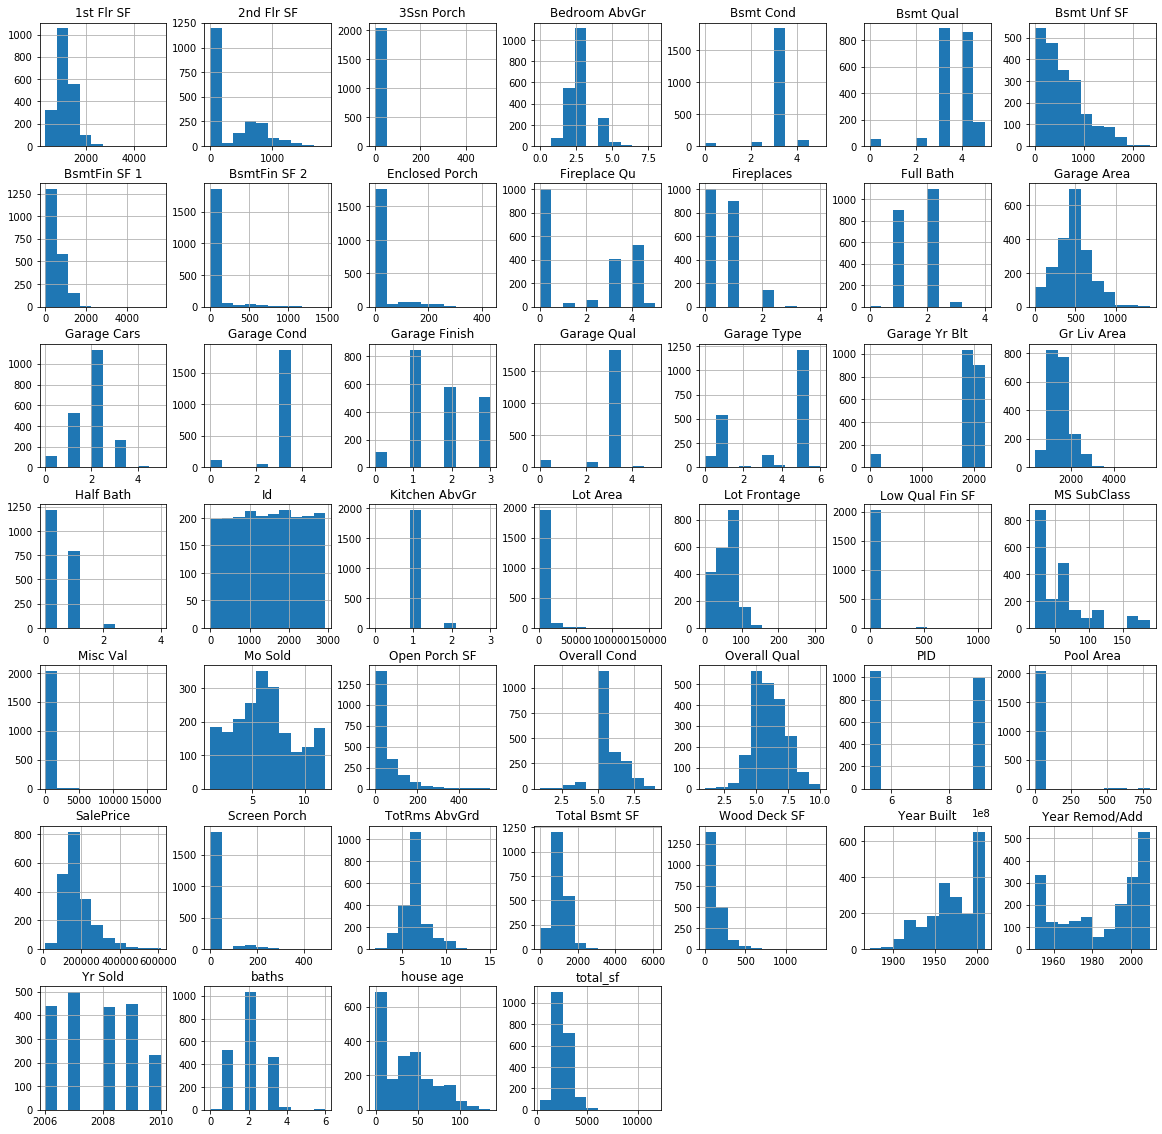

In [109]:
# running histogram on dataframe
train.hist(figsize=(20,20));

# Feature Engineering

In [378]:
# feature engineering
# features = [c for c in train_test._get_numeric_data().columns if c!= 'SalePrice']
# new features based on what would have the best correlation to Sale Price

# features = ['Overall Qual', 'Full Bath', 'total_sf', 'house age', 'Enclosed Porch',
#              'Yr Sold', 'Mo Sold','Year Built', 'Garage Cars', 'Open Porch SF', 'Neighborhood_Blmngtn',
#             'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
#             'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
#             'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
#             'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
#             'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
#             'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
#             'Neighborhood_Veenker', '3Ssn Porch', 'Screen Porch', 'baths', 'Overall Cond', 'Sale Type_COD',
#             'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
#             'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ', 'House Style_1.5Fin', 'House Style_1.5Unf',
#             'House Style_1Story', 'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
#             'House Style_SFoyer', 'House Style_SLvl', 'Garage Type', 'Pool Area']

# features below were for the model used on Kaggle
features = ['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bldg Type_1Fam', 'Bldg Type_2fmCon',
            'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Bsmt Cond', 'Bsmt Exposure_0',
            'Bsmt Exposure_Av', 'Bsmt Exposure_Gd', 'Bsmt Exposure_Mn', 'Bsmt Exposure_No', 'Bsmt Qual',
            'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'BsmtFin Type 1_0', 'BsmtFin Type 1_ALQ',
            'BsmtFin Type 1_BLQ', 'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_LwQ', 'BsmtFin Type 1_Rec', 
            'BsmtFin Type 1_Unf', 'BsmtFin Type 2_0', 'BsmtFin Type 2_ALQ', 'BsmtFin Type 2_BLQ', 'BsmtFin Type 2_GLQ', 
            'BsmtFin Type 2_LwQ', 'BsmtFin Type 2_Rec', 'BsmtFin Type 2_Unf', 'Central Air_N', 'Central Air_Y',
            'Condition 1_Artery', 'Condition 1_Feedr', 'Condition 1_Norm', 'Condition 1_PosA', 'Condition 1_PosN',
            'Condition 1_RRAe', 'Condition 1_RRAn', 'Condition 1_RRNe', 'Condition 1_RRNn', 'Condition 2_Feedr',
            'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN', 'Electrical_FuseA', 'Electrical_FuseF',
            'Electrical_FuseP', 'Electrical_SBrkr', 'Enclosed Porch', 'Exter Cond_Ex', 'Exter Cond_Fa', 'Exter Cond_Gd',
            'Exter Cond_Po', 'Exter Cond_TA', 'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA',
            'Exterior 1st_AsbShng', 'Exterior 1st_AsphShn', 'Exterior 1st_BrkComm', 'Exterior 1st_BrkFace',
            'Exterior 1st_CemntBd', 'Exterior 1st_HdBoard', 'Exterior 1st_MetalSd', 'Exterior 1st_Plywood',
            'Exterior 1st_Stucco', 'Exterior 1st_VinylSd', 'Exterior 1st_Wd Sdng', 'Exterior 1st_WdShing', 
            'Exterior 2nd_AsbShng','Exterior 2nd_AsphShn', 'Exterior 2nd_Brk Cmn', 'Exterior 2nd_BrkFace',
            'Exterior 2nd_CBlock', 'Exterior 2nd_CmentBd', 'Exterior 2nd_HdBoard', 'Exterior 2nd_ImStucc',
            'Exterior 2nd_MetalSd',  'Exterior 2nd_Plywood',  'Exterior 2nd_Stucco', 'Exterior 2nd_VinylSd',
            'Exterior 2nd_Wd Sdng', 'Exterior 2nd_Wd Shng', 'Fireplace Qu', 'Fireplaces', 'Foundation_BrkTil',
            'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
            'Full Bath', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
            'Functional_Typ', 'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish', 'Garage Qual', 
            'Garage Type', 'Garage Yr Blt', 'Gr Liv Area', 'Half Bath', 'Heating QC_Ex', 'Heating QC_Fa',
            'Heating QC_Gd', 'Heating QC_TA','Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'House Style_1.5Fin',
            'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
            'House Style_SFoyer', 'House Style_SLvl', 'Id', 'Kitchen AbvGr', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa',
            'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Land Contour_Bnk', 'Land Contour_HLS', 'Land Contour_Low',
            'Land Contour_Lvl','Land Slope_Gtl', 'Land Slope_Mod', 'Land Slope_Sev', 'Lot Area', 'Lot Config_Corner',
            'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Lot Frontage', 'Lot Shape_IR1',
            'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg', 'Low Qual Fin SF', 'MS SubClass', 'MS Zoning_C (all)',
            'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Misc Val', 'Mo Sold',
            'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale','Neighborhood_BrkSide', 'Neighborhood_ClearCr',
            'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 
            'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
            'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes','Neighborhood_NoRidge',
            'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
            'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
            'Neighborhood_Veenker', 'Open Porch SF', 'Overall Cond', 'Overall Qual', 'PID', 'Paved Drive_N',
            'Paved Drive_P', 'Paved Drive_Y', 'Pool Area', 'Roof Matl_CompShg', 'Roof Matl_Tar&Grv',
            'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Roof Style_Flat', 'Roof Style_Gable', 'Roof Style_Gambrel',
            'Roof Style_Hip', 'Roof Style_Mansard', 'Roof Style_Shed', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
            'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth',
            'Sale Type_WD ', 'Screen Porch', 'Street_Grvl', 'Street_Pave', 'TotRms AbvGrd', 'Total Bsmt SF',
            'Utilities_AllPub', 'Utilities_NoSewr', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold',
            'baths', 'house age', 'total_sf']

X = train_test[features] # declaring X variable with features
y = np.log(train_test['SalePrice']) # declaring y, using np.log to take natural log and normally distribute out target

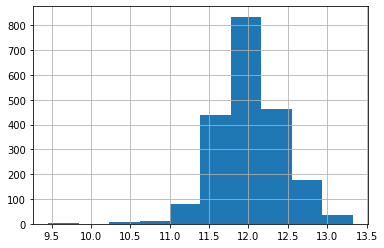

In [379]:
# plotting distribution for y (Sales Price) target
y.hist();

# Model Prep: Scaling

In [380]:
# setting train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y,)
ss = StandardScaler() # setting Standard Scalar
ss.fit(X_train) # fitting model
X_train_sc = ss.transform(X_train) # transforming standard scalar training data
X_test_sc = ss.transform(X_test) # transforming test data
# test_x = test[features]
test_sc = ss.transform(test_test[features])

In [381]:
# test[features].dtypes

In [382]:
test.shape

(879, 75)

## Model Prep: Instantiating Model

In [383]:
slr = LinearRegression() # declaring variable for LR
lasso = LassoCV(cv = 5) # declaring variable for Lasso LR
ridge = RidgeCV() # declaring variable for Ridge LR

## Cross Validation

In [384]:
# cross validation for singular LR
cross_val_score(slr, X_train_sc, y_train, cv =5).mean()

-1.6831799844787456e+24

In [385]:
# cross validation for Lasso LR
cross_val_score(lasso, X_train_sc, y_train, cv =5).mean()

0.8548768641310879

In [386]:
# cross validation for Ridge LR
cross_val_score(ridge, X_train_sc, y_train, cv =5).mean()

0.8483622383558138

## Model Fitting & Evaluation

In [387]:
# fitting Ridge model
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [388]:
slr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

### Model Scoring

In [390]:
# scoring lasso model test
lasso.score(X_test_sc, y_test)

0.8746901245846349

In [391]:
# scoring ridge model test
ridge.score(X_test_sc, y_test)

0.882896727673878

In [392]:
# scoring slr model test
slr.score(X_test_sc, y_test)

-1.922380444948785e+21

## Finalizing Model

In [393]:
new_submission = pd.DataFrame() # creating new submission dataframe
new_submission['Id'] = test['Id'] # setting submission id = to test id
new_submission['SalePrice'] = np.exp(lasso.predict(test_sc)) # creating prediction model column with np.exp to expon on predictions.
# new_submission.to_csv('./datasets/new_sub_lasso6.csv', index = False) # saving a new csv for new model